# HOMEWORK 5

In this homework you are going to implement the **Floyd-Steinberg dithering** algorithm. Dithering, in general, means that we are adding noise to the signal (in our case digital image) in order to perceive it better. In other words, by adding the noise the objective quality will be worse but the subjective quality will be better (i.e. the image will "look" better).

The details of FS dithering can be found in this [wiki](https://en.wikipedia.org/wiki/Floyd%E2%80%93Steinberg_dithering) page. In order to implement the dithering, we will implement the following steps:
* Define colour pallette
* Quantize the image to obtain the baseline and compute the average quantization error
* Implement FS dithering and compute the average quantization error

You will also have to answer the question at the end of this notebook.

Note: In this homework, you will have the chance to earn some extra points. See the "Bonus" section at the end of the notebook. Good luck!

As always, you are encouraged to use your own images :-)

In [13]:
import cv2
import math
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

Let's load the image.

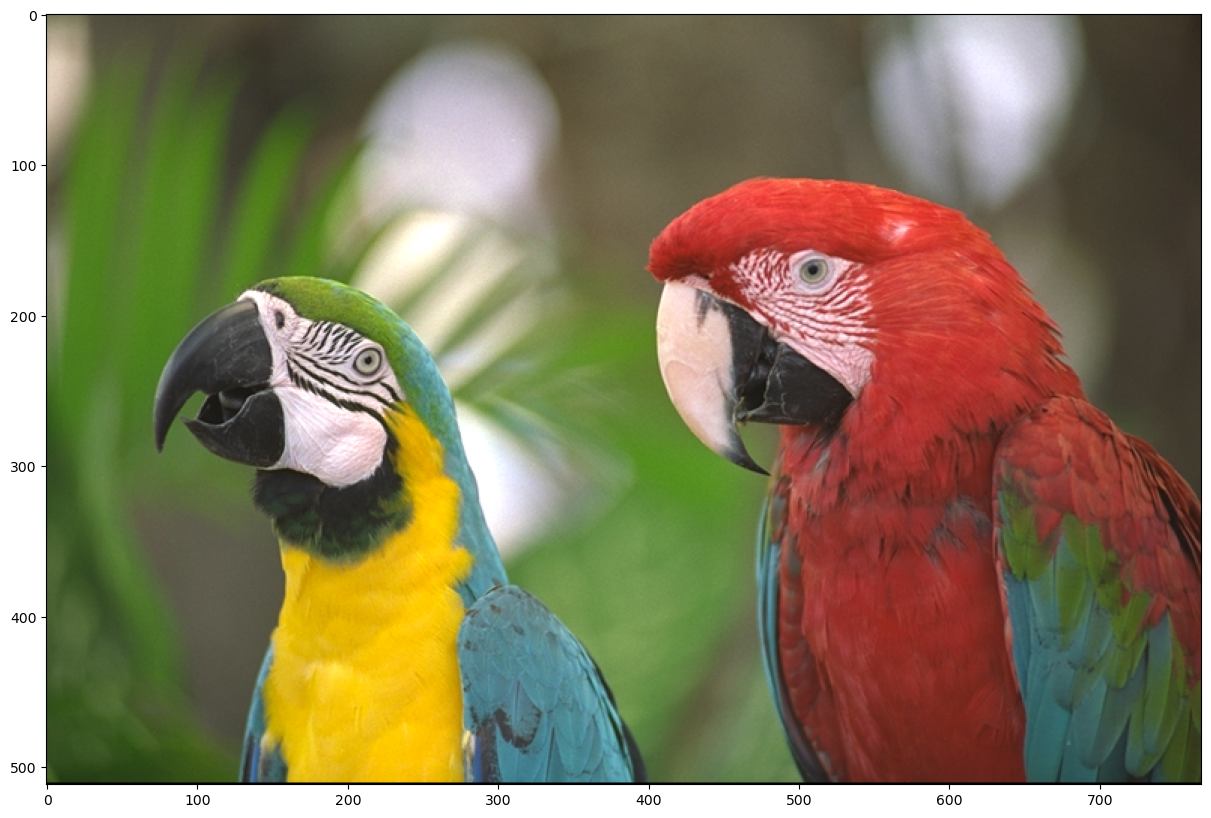

In [14]:
# Load image
img = cv2.imread('kodim23.png')
# Convert it to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Plot it
plt.imshow(img)

Let's start with gray tones first.

In [15]:
# Black, dark gray, light gray, white
colors = np.array([[0, 0, 0],
                   [64, 64, 64],
                   [192, 192, 192],
                   [255, 255, 255]])

Using the colour pallette, let's quantize the original image.

In [16]:
# Cast the image to float
img = img.astype(np.float64)

# Prepare for quantization
rows, cols, channels = img.shape
quantized = np.zeros_like(img)

# Apply quantization
for r in range(rows):
    for c in range(cols):
        # Extract the original pixel value
        pixel = img[r, c, :]
        
        # Find the closest colour from the pallette (using absolute value/Euclidean distance)
        # Note: You may need more than one line of code here
        distances = np.sqrt(np.sum((colors - pixel) ** 2, axis=1))
        new_pixel =  colors[np.argmin(distances)]
        
        # Apply quantization
        quantized[r, c, :] = new_pixel

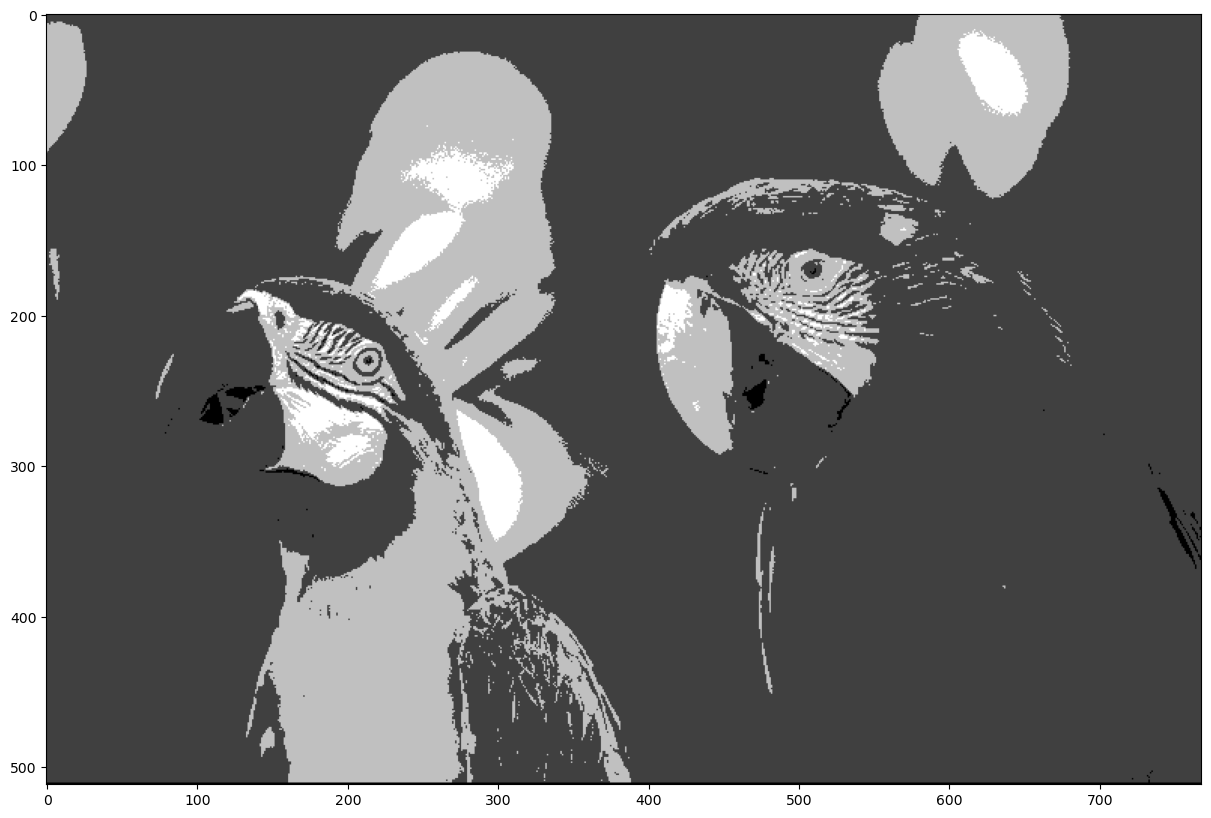

In [17]:
# Show quantized image (don't forget to cast back to uint8)
plt.imshow(quantized.astype(np.uint8))

In [18]:
# Compute average quantization error
avg_quant_error = np.mean(np.sqrt(np.sum((img - quantized) ** 2, axis=2)))
print(f"Average quantization error: {avg_quant_error:.4f}")

Average quantization error: 67.7324


#### Floyd-Steinberg Dithering
We are now going to implement the FS dithering and compare it to the optimally quantized image we have calculated above.

In [19]:
# Make a temporal copy of the original image, we will need it for error diffusion
img_tmp = np.copy(img)
dithering = np.zeros_like(img)

for r in range(1, rows-1):
    for c in range(1, cols-1):
        # Extract the original pixel value
        pixel = img_tmp[r, c, :]
        # Find the closest colour from the pallette (using absolute value/Euclidean distance)
        # Note: You may need more than one line of code here
        distances = np.sqrt(np.sum((colors - pixel) ** 2, axis=1))
        new_pixel = colors[np.argmin(distances)]         
        
        # Compute quantization error
        quant_error = pixel - new_pixel
        
        # Diffuse the quantization error accroding to the FS diffusion matrix
        # Note: You may need more than one line of code here
        img_tmp[r, c+1, :] += quant_error * 7/16
        img_tmp[r+1, c-1, :] += quant_error * 3/16
        img_tmp[r+1, c, :] += quant_error * 5/16
        img_tmp[r+1, c+1, :] += quant_error * 1/16
        # Apply dithering
        dithering[r, c, :] = new_pixel

(<Axes: >, <matplotlib.image.AxesImage at 0x2a487fcf510>)

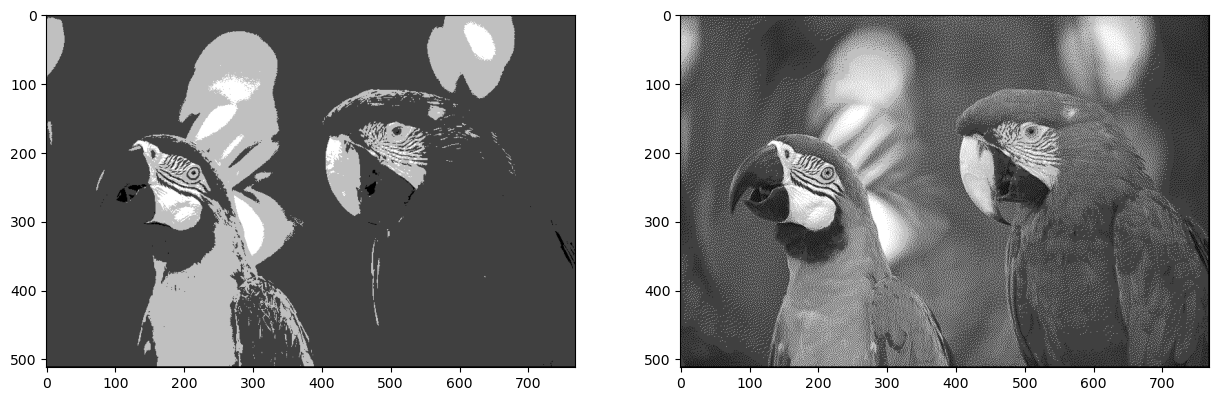

In [20]:
# Show quantized image (don't forget to cast back to uint8)
plt.subplot(121), plt.imshow(quantized.astype(np.uint8))   # optimally quantized
plt.subplot(122), plt.imshow(dithering.astype(np.uint8))   # dithering

In [21]:
# Compute average quantization error for dithered image
avg_dith_error = np.mean(np.sqrt(np.sum((img - dithering) ** 2, axis=2)))
print(f"Average dithering error: {avg_dith_error:.4f}")

Average dithering error: 82.2317


### Questions
* Which image has higher quantization error? Optimally quantized or dithered?
* Which image looks better to you?
* Can you repeat the same process using only two colours: black and white? Show me :-)

Дизеринг имеет большую ошибку, чем оптимальное квантование.

Дизеринг выглядит лучше субъективно.

Чёрно-белая палитра — палитра из двух цветов [0,0,0] и [255,255,255], квантование и FS-дизеринг по тому же принципу. Результат с дизерингом должен выглядеть как классическое газетное фото.

(<Axes: title={'center': 'B&W Dithered'}>,
 Text(0.5, 1.0, 'B&W Dithered'))

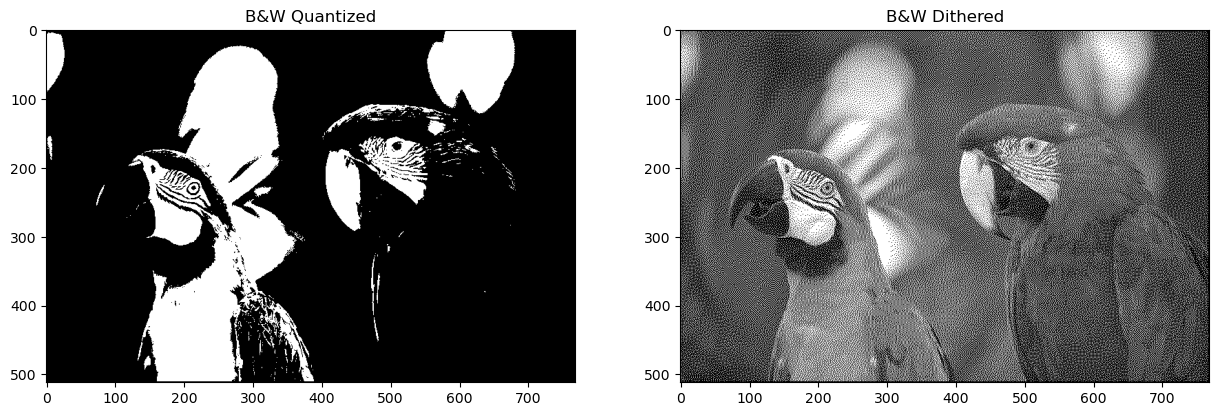

In [22]:
# Black and white palette
bw_colors = np.array([[0, 0, 0],
                       [255, 255, 255]])

# --- Optimal quantization with B&W ---
bw_quantized = np.zeros_like(img)
for r in range(rows):
    for c in range(cols):
        pixel = img[r, c, :]
        distances = np.sqrt(np.sum((bw_colors - pixel) ** 2, axis=1))
        bw_quantized[r, c, :] = bw_colors[np.argmin(distances)]

# --- FS dithering with B&W ---
img_tmp_bw = np.copy(img)
bw_dithering = np.zeros_like(img)
for r in range(1, rows-1):
    for c in range(1, cols-1):
        pixel = img_tmp_bw[r, c, :]
        distances = np.sqrt(np.sum((bw_colors - pixel) ** 2, axis=1))
        new_pixel = bw_colors[np.argmin(distances)]
        quant_error = pixel - new_pixel
        img_tmp_bw[r,     c + 1, :] += quant_error * 7 / 16
        img_tmp_bw[r + 1, c - 1, :] += quant_error * 3 / 16
        img_tmp_bw[r + 1, c,     :] += quant_error * 5 / 16
        img_tmp_bw[r + 1, c + 1, :] += quant_error * 1 / 16
        bw_dithering[r, c, :] = new_pixel

# Show results
plt.subplot(121), plt.imshow(bw_quantized.astype(np.uint8)), plt.title('B&W Quantized')
plt.subplot(122), plt.imshow(bw_dithering.astype(np.uint8)), plt.title('B&W Dithered')

### Bonus Points

Repeat the homework using a diffrerent image pallette. For instance, you can use an optimal colour
pallette that we can calculate via k-means algorithm. The following snippet of code will give you the 16
optimal colours for your original image.

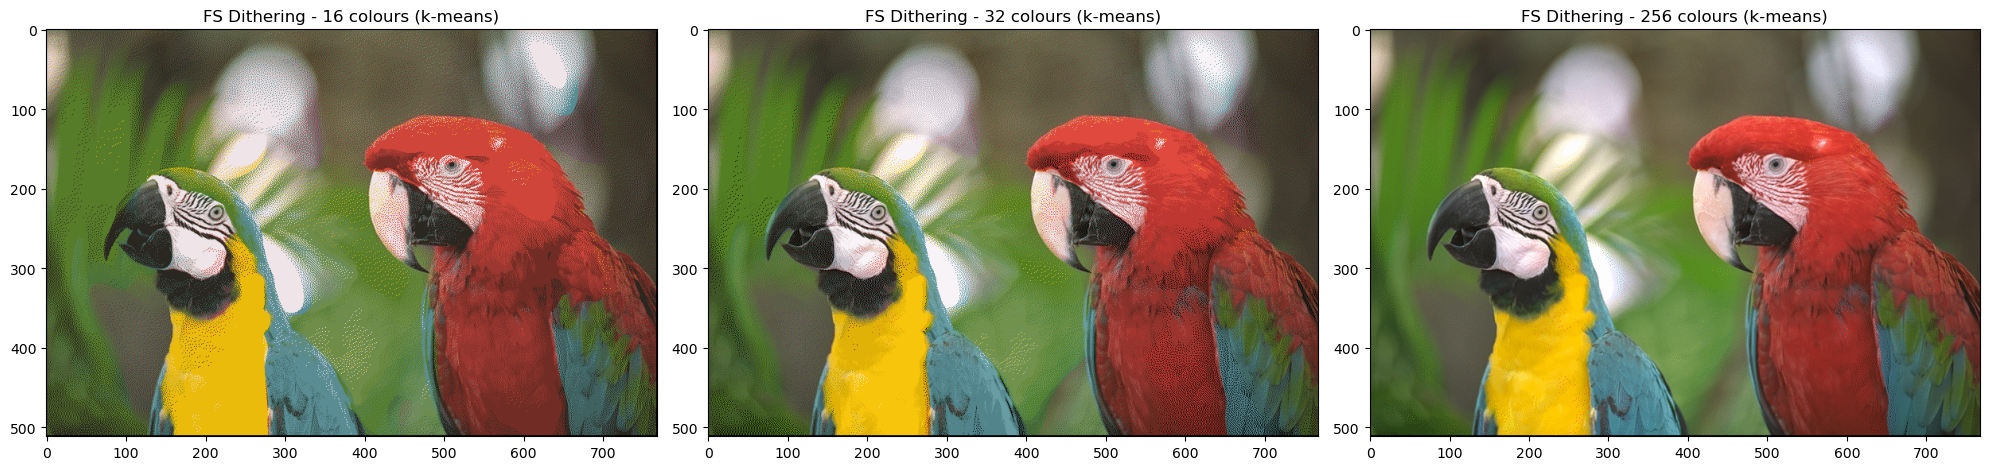

In [23]:
from sklearn.cluster import KMeans
def fs_dithering(image, palette):
    """Apply Floyd-Steinberg dithering with given palette."""
    rows, cols, _ = image.shape
    img_tmp = np.copy(image)
    result = np.zeros_like(image)
    for r in range(1, rows-1):
        for c in range(1, cols-1):
            pixel = img_tmp[r, c, :]
            distances = np.sqrt(np.sum((palette - pixel) ** 2, axis=1))
            new_pixel = palette[np.argmin(distances)]
            quant_error = pixel - new_pixel
            img_tmp[r,     c + 1, :] += quant_error * 7 / 16
            img_tmp[r + 1, c - 1, :] += quant_error * 3 / 16
            img_tmp[r + 1, c,     :] += quant_error * 5 / 16
            img_tmp[r + 1, c + 1, :] += quant_error * 1 / 16
            result[r, c, :] = new_pixel
    return result

# 16 colours via k-means
kmeans16 = KMeans(n_clusters=16, n_init=10, random_state=42).fit(np.reshape(img, (-1, 3)))
colors_16 = kmeans16.cluster_centers_
dith_16 = fs_dithering(img, colors_16)

# 32 colours via k-means
kmeans32 = KMeans(n_clusters=32, n_init=10, random_state=42).fit(np.reshape(img, (-1, 3)))
colors_32 = kmeans32.cluster_centers_
dith_32 = fs_dithering(img, colors_32)

# 256 colours via k-means
kmeans256 = KMeans(n_clusters=256, n_init=10, random_state=42).fit(np.reshape(img, (-1, 3)))
colors_256 = kmeans256.cluster_centers_
dith_256 = fs_dithering(img, colors_256)

# Show results
plt.figure(figsize=(20, 12))
plt.subplot(131), plt.imshow(dith_16.astype(np.uint8)), plt.title('FS Dithering - 16 colours (k-means)')
plt.subplot(132), plt.imshow(dith_32.astype(np.uint8)), plt.title('FS Dithering - 32 colours (k-means)')
plt.subplot(133), plt.imshow(dith_256.astype(np.uint8)), plt.title('FS Dithering - 256 colours (k-means)')
plt.tight_layout()

Apply FS dithering the same way you did before.
* How does the result look like to you?
* What happens if we use 32 colours?
* And what happens if we use 256 colours?


С 16 оптимальными цветами (k-means) изображение после дизеринга выглядит значительно лучше, чем с палитрой из 4 серых тонов. Палитра k-means захватывает доминирующие цвета изображения, поэтому результат сохраняет цветовую информацию, а дизеринг сглаживает переходы.

С 32 цветами результат улучшается ещё больше — цветовые градиенты становятся более плавными, а артефакты дизеринга менее заметными.

С 256 цветами изображение после дизеринга практически неотличимо от оригинала. Палитра достаточно богата, чтобы представить почти все оттенки, поэтому ошибка квантования минимальна и дизеринг почти незаметен.